# Code for Pose Recommendation based on feature fusion

## 1.Unzip data folder

In [1]:
!unzip -q '/content/DATASET.zip'

## 2.Local feature extraction code

In [2]:
# import the necessary packages
import numpy as np
import cv2
import imutils
class ColorDescriptor:
  def __init__(self, bins):
    # store the number of bins for the 3D histogram
    self.bins = bins
  def describe(self, image):
    # convert the image to the HSV color space and initialize
    # the features used to quantify the image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    features = []
    # grab the dimensions and compute the center of the image
    (h, w) = image.shape[:2]
    (cX, cY) = (int(w * 0.5), int(h * 0.5))
  # divide the image into four rectangles/segments (top-left,
    # top-right, bottom-right, bottom-left)
    segments = [(0, cX, 0, cY), (cX, w, 0, cY), (cX, w, cY, h),
      (0, cX, cY, h)]
    # construct an elliptical mask representing the center of the
    # image
    (axesX, axesY) = (int(w * 0.75) // 2, int(h * 0.75) // 2)
    ellipMask = np.zeros(image.shape[:2], dtype = "uint8")
    cv2.ellipse(ellipMask, (cX, cY), (axesX, axesY), 0, 0, 360, 255, -1)
    # loop over the segments
    for (startX, endX, startY, endY) in segments:
      # construct a mask for each corner of the image, subtracting
      # the elliptical center from it
      cornerMask = np.zeros(image.shape[:2], dtype = "uint8")
      cv2.rectangle(cornerMask, (startX, startY), (endX, endY), 255, -1)
      cornerMask = cv2.subtract(cornerMask, ellipMask)
      # extract a color histogram from the image, then update the
      # feature vector
      hist = self.histogram(image, cornerMask)
      features.extend(hist)
    # extract a color histogram from the elliptical region and
    # update the feature vector
    hist = self.histogram(image, ellipMask)
    features.extend(hist)
    # return the feature vector
    return features
  def histogram(self, image, mask):
    # extract a 3D color histogram from the masked region of the
    # image, using the supplied number of bins per channel
    hist = cv2.calcHist([image], [0, 1, 2], mask, self.bins,
      [0, 180, 0, 256, 0, 256])
    # normalize the histogram if we are using OpenCV 2.4
    if imutils.is_cv2():
      hist = cv2.normalize(hist).flatten()
    # otherwise handle for OpenCV 3+
    else:
      hist = cv2.normalize(hist, hist).flatten()
    # return the histogram
    return hist

## 3. Global feature extraction code

In [3]:
from keras.applications import (vgg16,  vgg19, xception, resnet,
                                inception_v3,  inception_resnet_v2, 
                                mobilenet,densenet, nasnet, mobilenet_v2)
vgg_model = vgg16.VGG16(weights='imagenet')
res_101 = resnet.ResNet101(weights = 'imagenet')

from keras.preprocessing.image import load_img,img_to_array
import numpy as np
import matplotlib.pyplot as plt

179658752/179648224 [==============================] - 2s 0us/step


### 3.1Specify paths and names of query images

In [4]:
paths = ['/content/beach.jpg','/content/bench1.jpg', '/content/lake.jpg', '/content/mount2.jpg', '/content/off3.jpg', '/content/off4.jpg',  '/content/p9.jpg', '/content/q1.jpg', '/content/query_building.jpg', '/content/s3.jpg', '/content/t1.jpg']
names = ['beach.jpg', 'bench1.jpg', 'lake.jpg','mount2.jpg','off3.jpg','off4.jpg','p9.jpg','q1.jpg','query_building.jpg','s3.jpg','t1.jpg']

### 3.2 Extract features from VGG16, ResNet101 and local features and fuse them 

1068
(1068, 224, 224, 3)
1068
1068
(1068, 1440)
(1068, 224, 224, 3)
1068
(1068, 224, 224, 3)
1068
1068
(1068, 1440)
(1068, 224, 224, 3)
1068
(1068, 224, 224, 3)
1068
1068
(1068, 1440)
(1068, 224, 224, 3)
1068
(1068, 224, 224, 3)
1068
1068
(1068, 1440)
(1068, 224, 224, 3)
1068
(1068, 224, 224, 3)
1068
1068
(1068, 1440)
(1068, 224, 224, 3)
1068
(1068, 224, 224, 3)
1068
1068
(1068, 1440)
(1068, 224, 224, 3)
1068
(1068, 224, 224, 3)
1068
1068
(1068, 1440)
(1068, 224, 224, 3)
1068
(1068, 224, 224, 3)
1068
1068
(1068, 1440)
(1068, 224, 224, 3)
1068
(1068, 224, 224, 3)
1068
1068
(1068, 1440)
(1068, 224, 224, 3)
1068
(1068, 224, 224, 3)
1068
1068
(1068, 1440)
(1068, 224, 224, 3)
1068
(1068, 224, 224, 3)
1068
1068
(1068, 1440)
(1068, 224, 224, 3)
(1068, 4096)
(1068, 2048)
(1068, 6144)
(1068, 7584)
['/content/DATASET - 13-3/beach (31).jpg', '/content/DATASET - 13-3/gettyimages-1317920776-612x612.jpg', '/content/DATASET - 13-3/gettyimages-692741485-612x612.jpg', '/content/DATASET - 13-3/gettyimag

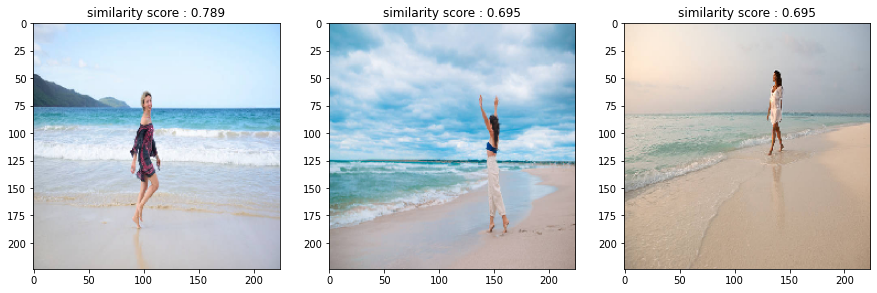

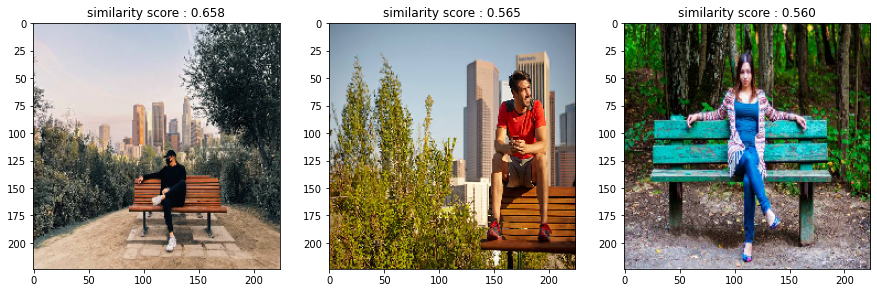

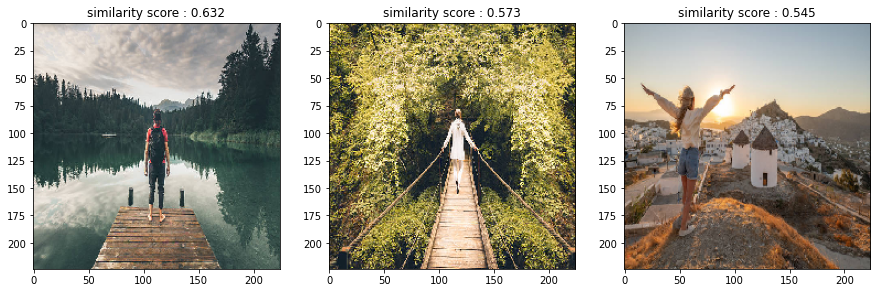

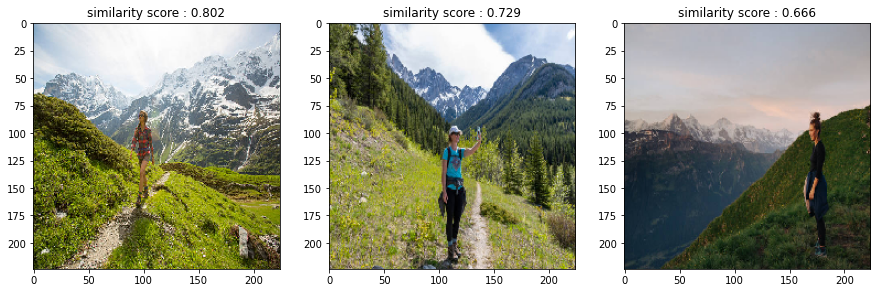

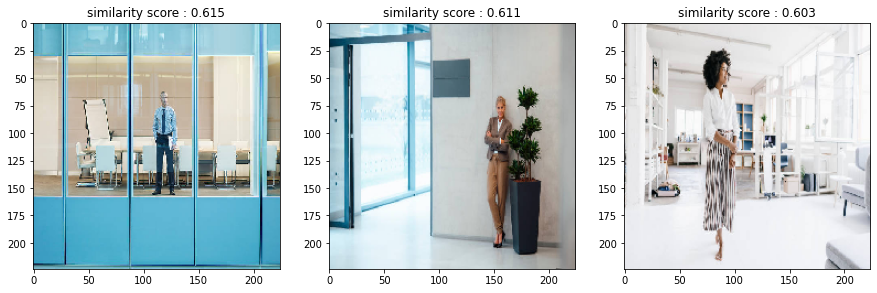

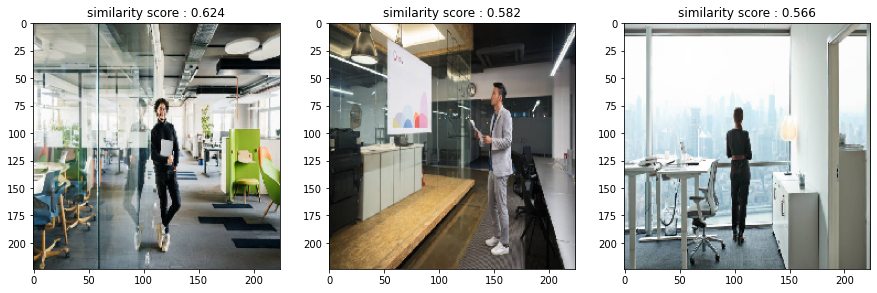

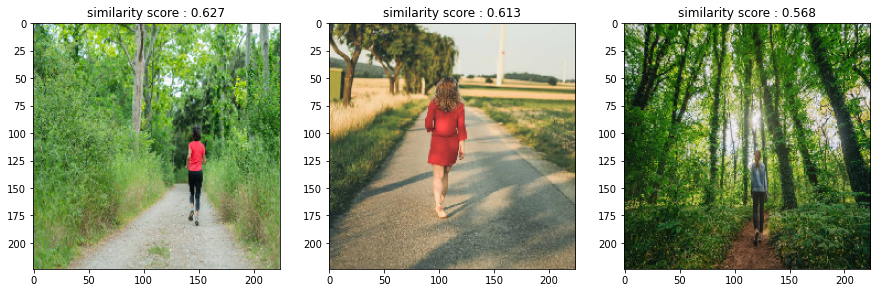

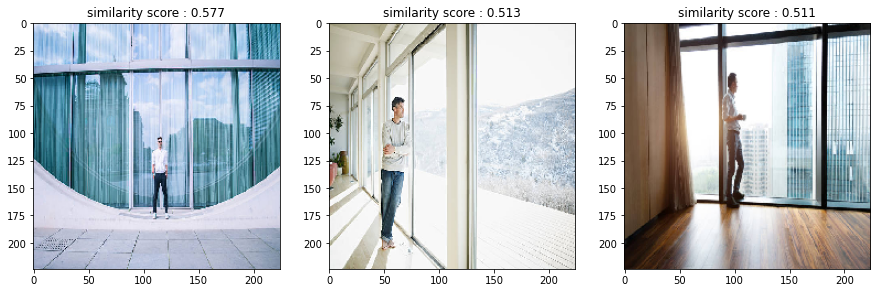

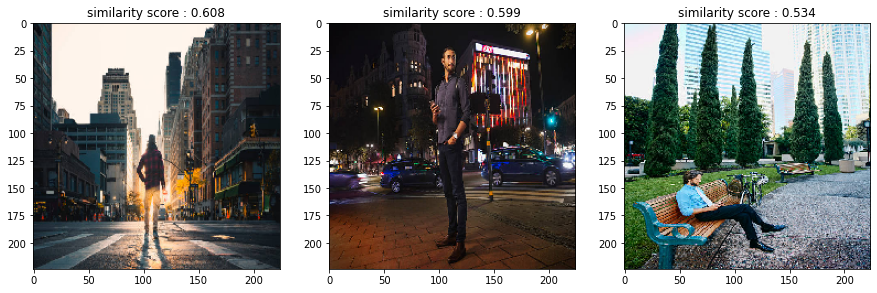

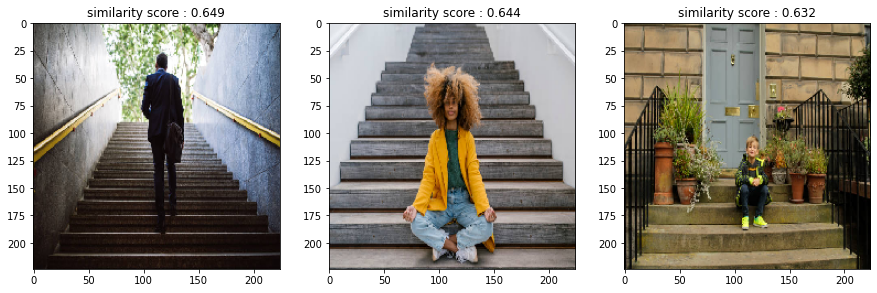

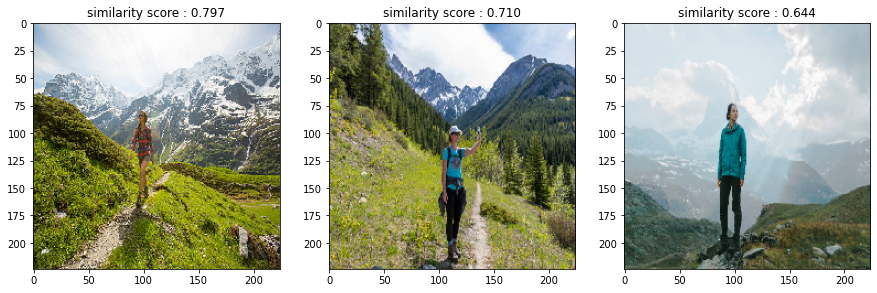

In [5]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
list_of_images = []
#vgg16 features
for path in paths:
  selected_model = vgg_model
  image_width = eval(str(selected_model.layers[0].output.shape[1]))
  image_height = eval(str(selected_model.layers[0].output.shape[2]))
  pil_img = load_img(path,  target_size=(image_width, image_height))
  array_img = img_to_array(pil_img)
  images = np.expand_dims(array_img, axis=0)
  cd = ColorDescriptor((8, 12, 3)) #local features

  import os
  list_of_pics_array= []
  importedImages = []
  from keras.applications.imagenet_utils import preprocess_input
  inputDir = "/content/DATASET - 13-3"
  for imageName in os.listdir(inputDir):
      I = os.path.join(inputDir, imageName)
      original = load_img(I, target_size=(image_height, image_width))
      numpy_image = img_to_array(original)
      image = np.expand_dims(numpy_image, axis=0)
      list_of_pics_array.append(image)
      image = cv2.imread(I)
      # describe the image
      features = cd.describe(image)
  #same steps for input image
  inp_img = path
  inp_orig = load_img(inp_img, target_size=(image_height, image_width))
  np_inp_img = img_to_array(inp_orig)
  i_img = np.expand_dims(np_inp_img, axis=0)
  list_of_pics_array.append(i_img)
  print(len(list_of_pics_array))

  img = cv2.imread(inp_img)
  features = cd.describe(img)

  images = np.vstack(list_of_pics_array)

  dense_mat = preprocess_input(images)
  print(dense_mat.shape)

  from keras.models import Model
  feat_extract = Model(inputs=selected_model.input,outputs=selected_model.layers[-2].output)
  imgs_features_vgg16 = feat_extract.predict(dense_mat)
  

  #resnet features
  selected_model = res_101
  image_width = eval(str(selected_model.layers[0].output.shape[1]))
  image_height = eval(str(selected_model.layers[0].output.shape[2]))
  pil_img = load_img(path,  target_size=(image_width, image_height))
  array_img = img_to_array(pil_img)
  images = np.expand_dims(array_img, axis=0)
  cd = ColorDescriptor((8, 12, 3)) #local features

  import os
  list_of_pics_array= []
  list_of_local_features = []
  importedImages = []
  from keras.applications.imagenet_utils import preprocess_input
  inputDir = "/content/DATASET - 13-3"
  for imageName in os.listdir(inputDir):
      I = os.path.join(inputDir, imageName)
      original = load_img(I, target_size=(image_height, image_width))
      numpy_image = img_to_array(original)
      image = np.expand_dims(numpy_image, axis=0)
      list_of_pics_array.append(image)
      image = cv2.imread(I)
      # describe the image
      features = cd.describe(image)
      list_of_local_features.append(features)
  #same steps for input image
  inp_img = path
  inp_orig = load_img(inp_img, target_size=(image_height, image_width))
  np_inp_img = img_to_array(inp_orig)
  i_img = np.expand_dims(np_inp_img, axis=0)
  list_of_pics_array.append(i_img)
  print(len(list_of_pics_array))

  img = cv2.imread(inp_img)
  features = cd.describe(img)
  list_of_local_features.append(features)
  print(len(list_of_local_features))

  images = np.vstack(list_of_pics_array)
  local_feat = np.vstack(list_of_local_features)


  print(local_feat.shape)
  dense_mat = preprocess_input(images)
  print(dense_mat.shape)

  from keras.models import Model
  feat_extract = Model(inputs=selected_model.input,outputs=selected_model.layers[-2].output)
  imgs_features_resnet = feat_extract.predict(dense_mat)

  #concatenation of vgg16 and resnet features
  feat_fusion = np.concatenate((imgs_features_vgg16,imgs_features_resnet), axis = 1)

  #concatenation of global and local features
  global_local_fusion = np.concatenate((feat_fusion, local_feat), axis = 1)

  #cosine similarity
  cols = os.listdir(inputDir)
  inp_img_name = names[0]
  cols.append(inp_img_name) 
  cosSimilarities = cosine_similarity(feat_fusion)
  cos_similarities_df = pd.DataFrame(cosSimilarities, columns=cols, index=cols)

  def ddl_images(image_url) :
      return load_img(image_url,target_size=(224,224))
          
  nb_closest_images = 3

  closest_imgs = cos_similarities_df[inp_img_name].sort_values(ascending=False)[1:nb_closest_images+1].index
  closest_imgs_scores = cos_similarities_df[inp_img_name].sort_values(ascending=False)[1:nb_closest_images+1]

  fig = plt.figure(figsize=(15, 7))
    
  # setting values to rows and column variables
  rows = 1
  columns = 3
    
  # reading images
  
  o1 = ddl_images("/content/DATASET - 13-3/"+closest_imgs[0])
  o2 = ddl_images("/content/DATASET - 13-3/"+closest_imgs[1])
  o3 = ddl_images("/content/DATASET - 13-3/"+closest_imgs[2])
  list_of_images.append("/content/DATASET - 13-3/"+closest_imgs[0]) 
  # Adds a subplot at the 1st position
  fig.add_subplot(rows, columns, 1)
    
  # showing image
  plt.imshow(o1)
  plt.title("similarity score : %1.3f"%closest_imgs_scores[0])
    
  # Adds a subplot at the 2nd position
  fig.add_subplot(rows, columns, 2)
    
  # showing image
  plt.imshow(o2)
  plt.title("similarity score : %1.3f"%closest_imgs_scores[1])
    
  # Adds a subplot at the 3rd position
  fig.add_subplot(rows, columns, 3)
    
  # showing image
  plt.imshow(o3)
  plt.title("similarity score : %1.3f"%closest_imgs_scores[2])

print(imgs_features_vgg16.shape)
print(imgs_features_resnet.shape)
print(feat_fusion.shape)
print(global_local_fusion.shape)
print(list_of_images)

## 4. Openpose Code

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
net = cv.dnn.readNetFromTensorflow("/content/drive/MyDrive/Session/graph_opt.pb")

inWidth = 368
inHeight = 368
thr = 0.2

BODY_PARTS = { "Nose": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
               "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
               "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "REye": 14,
               "LEye": 15, "REar": 16, "LEar": 17, "Background": 18 }

POSE_PAIRS = [ ["Neck", "RShoulder"], ["Neck", "LShoulder"], ["RShoulder", "RElbow"],
               ["RElbow", "RWrist"], ["LShoulder", "LElbow"], ["LElbow", "LWrist"],
               ["Neck", "RHip"], ["RHip", "RKnee"], ["RKnee", "RAnkle"], ["Neck", "LHip"],
               ["LHip", "LKnee"], ["LKnee", "LAnkle"], ["Neck", "Nose"], ["Nose", "REye"],
               ["REye", "REar"], ["Nose", "LEye"], ["LEye", "LEar"] ]



def pose_estimation(frame,to_drawon):
  frameWidth = frame.shape[1]
  frameHeight = frame.shape[0]

  to_drawon = cv.resize(to_drawon,(frameWidth,frameHeight), interpolation = cv.INTER_AREA)

  net.setInput(cv.dnn.blobFromImage(frame, 1.0, (inWidth, inHeight), (127.5, 127.5, 127.5), swapRB=True, crop=False))
  out = net.forward()
  out = out[:, :19, :, :]  # MobileNet output [1, 57, -1, -1], we only need the first 19 elements

  assert(len(BODY_PARTS) == out.shape[1])

  points = []
  for i in range(len(BODY_PARTS)):
      # Slice heatmap of corresponging body's part.
      heatMap = out[0, i, :, :]

      # Originally, we try to find all the local maximums. To simplify a sample
      # we just find a global one. However only a single pose at the same time
      # could be detected this way.
      _, conf, _, point = cv.minMaxLoc(heatMap)
      x = (frameWidth * point[0]) / out.shape[3]
      y = (frameHeight * point[1]) / out.shape[2]
      # Add a point if it's confidence is higher than threshold.
      points.append((int(x), int(y)) if conf > thr else None)

  for pair in POSE_PAIRS:
      partFrom = pair[0]
      partTo = pair[1]
      assert(partFrom in BODY_PARTS)
      assert(partTo in BODY_PARTS)

      idFrom = BODY_PARTS[partFrom]
      idTo = BODY_PARTS[partTo]

      if points[idFrom] and points[idTo]:
          cv.line(to_drawon, points[idFrom], points[idTo], (0, 255, 0), 3)
          cv.ellipse(to_drawon, points[idFrom], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)
          cv.ellipse(to_drawon, points[idTo], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)
  
  return to_drawon

## 5. Apply open pose on images and superimpose the pose on query images

### 5.1 Show query image

In [ ]:
#openpose on recommended images
print(list_of_images)
i = 10
img2 = cv.imread(paths[i])
orig_dim = (img2.shape[1],img2.shape[0])
plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))

### 5.2 Show Recommended image

In [ ]:
img = cv.imread(list_of_images[i])
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))


### 5.3 Show Skeleton on query image

In [ ]:
imgop = pose_estimation(img,img2)
plt.imshow(cv.cvtColor(imgop, cv.COLOR_BGR2RGB))

RUNTIME ANALYSIS
